In [1]:
#Linear Regression

In [2]:
#1 Import Libraries 

In [37]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt


In [34]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score ,mean_absolute_error, mean_squared_error

In [9]:
california = fetch_california_housing()

In [13]:
df = pd.DataFrame(data=california.data , columns = california.feature_names)

In [14]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [15]:
df.shape

(20640, 8)

In [16]:
#2. After importing all libraries and dataset now CLEAN the data

In [17]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [18]:
#3. Split the data into x and y  x = input columns and y = output or target columns

In [19]:
df['target'] = california.target

In [20]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [22]:
x = df.drop('target' , axis =1 )
y = df['target']

In [41]:
x_train , x_test , y_train,y_test = train_test_split(x,y,test_size = 0.20 , random_state = 0)

In [24]:
x_train.shape

(16512, 8)

In [25]:
x_test.shape

(4128, 8)

In [26]:
y_train.shape

(16512,)

In [27]:
y_test.shape

(4128,)

In [28]:
#4. Now we need to Train Our Model

In [42]:
model = LinearRegression()

In [43]:
model.fit(x_train,y_train)

LinearRegression()

In [45]:
y_pred = model.predict(x_test)

In [32]:
#5. Now check metrics and accuracy 

In [46]:
print("r2 Score" , r2_score(y_test,y_pred))

r2 Score 0.5943232652466205


In [47]:
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

MAE: 0.5351
MSE: 0.5290
RMSE: 0.7273


In [36]:
#6. Visualization

C:\Users\himan\AppData\Local\Temp\ipykernel_22472\489150905.py:15: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\himan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


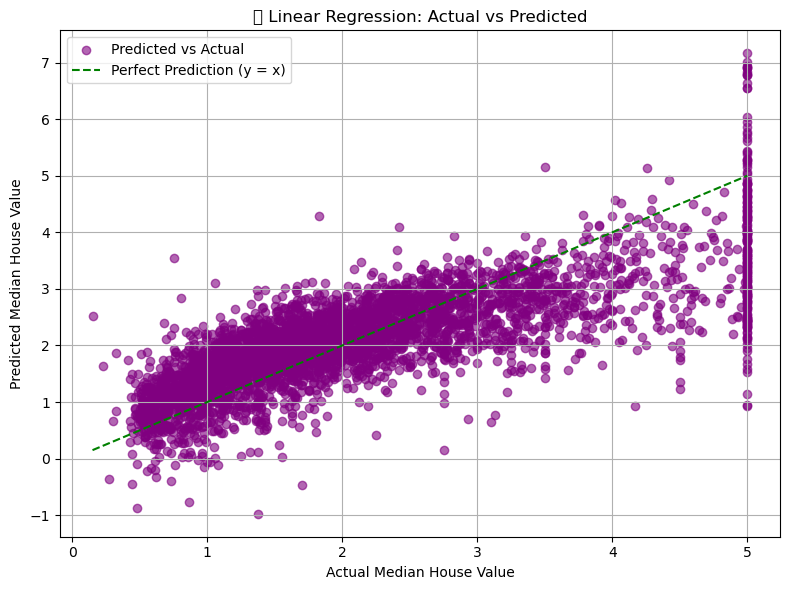

In [48]:
plt.figure(figsize=(8, 6))

# Scatter plot of predicted vs actual
plt.scatter(y_test, y_pred, color='purple', alpha=0.6, label='Predicted vs Actual')

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='green', linestyle='--', label='Perfect Prediction (y = x)')

plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("📉 Linear Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
